In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
sns.set(rc={'figure.figsize':(24, 15)}, font_scale=2)

import math

import sys
sys.path.append('../')
import utils
import synthetic_data_generator as sdg

from tqdm import tqdm
from glob import glob

from sklearn.metrics import ndcg_score

In [2]:
%load_ext autoreload
%autoreload 2

# Illustrating issue with low peaks

In [3]:
scores_dir="../streaming_data/all_outlier_types/ISJ/outputs/"
density_df = pd.read_pickle(scores_dir + 'size_2208/density_df.pickle')
clusters_df = pd.read_pickle(scores_dir + 'size_2208/clusters_df.pickle').sort_values(by=['area'], ascending=False).head(2)
df = pd.read_pickle(scores_dir + 'size_2208/df.pickle')

top_minima = clusters_df['start'].tolist() + clusters_df['end'].tolist() 
minima_df = density_df[density_df['unix_time'].isin(top_minima)] 
minima_df

,unix_time,density,timestamp
3070,1.594652e+09,2.220446e-16,2020-07-13 15:01:20.220443904
3116,1.594708e+09,6.647691e-06,2020-07-14 06:21:04.940359424
3141,1.594738e+09,6.576541e-06,2020-07-14 14:40:56.635965696
3189,1.594795e+09,2.220446e-16,2020-07-15 06:40:40.691529472


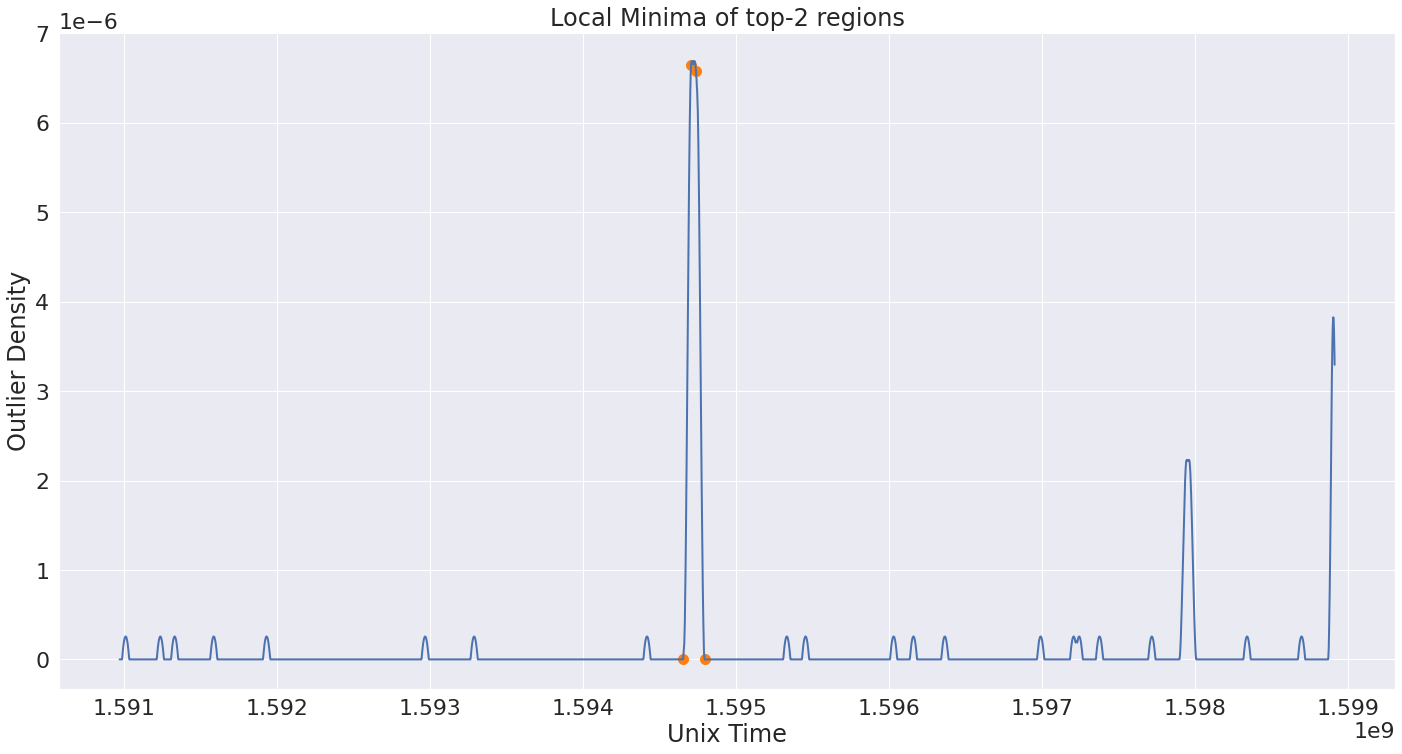

In [4]:
plt.plot(density_df['unix_time'], density_df['density'], linewidth=2)
plt.scatter(minima_df['unix_time'], minima_df['density'], s=100, color='tab:orange')
plt.xlabel('Unix Time');plt.ylabel('Outlier Density');plt.title('Local Minima of top-2 regions');plt.tight_layout()
plt.savefig('../figures/benchmarking/region_boundaries/problematic_local_minima.svg')

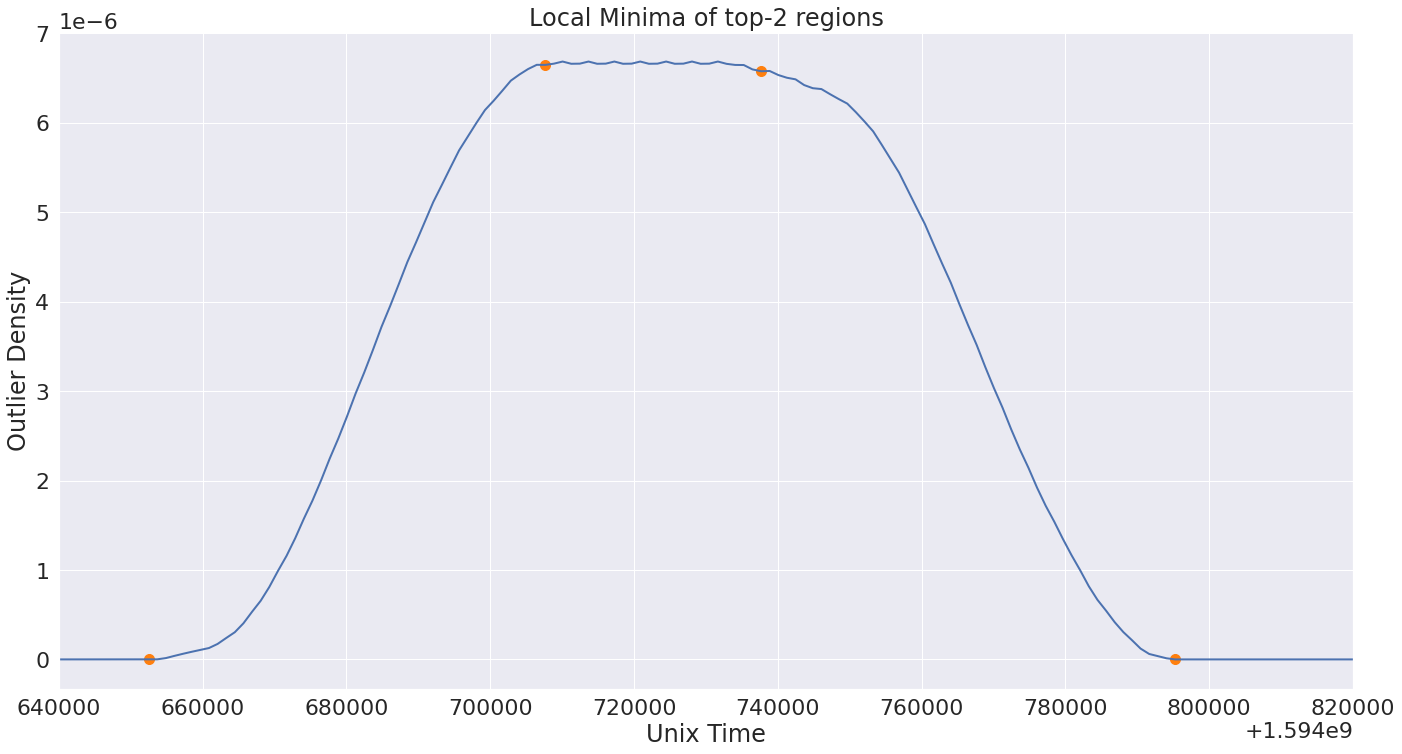

In [5]:
plt.plot(density_df['unix_time'], density_df['density'], linewidth=2)
plt.scatter(minima_df['unix_time'], minima_df['density'], s=100, color='tab:orange')
plt.xlim(1.59464e9,1.59482e9)
plt.xlabel('Unix Time');plt.ylabel('Outlier Density');plt.title('Local Minima of top-2 regions');plt.tight_layout()
plt.savefig('../figures/benchmarking/region_boundaries/problematic_local_minima_zoomed.svg')

# Local Minima Adjustments

In [6]:
density_df_filtered = density_df[(density_df['unix_time'] >= 1.59464e9) & (density_df['unix_time'] <= 1.59482e9)]
density_df_filtered = density_df_filtered.reset_index(drop=True)

# Get the list of detected outliers
df = df[(df['unix_time'] >= 1.59464e9) & (df['unix_time'] <= 1.59482e9)]
outliers_df = df.copy()[df['raw_voting_score'] > 0]

minima = utils.clustering.get_local_minima(density_df_filtered['density'].to_numpy())
maxima = utils.clustering.get_local_maxima(density_df_filtered['density'].to_numpy())

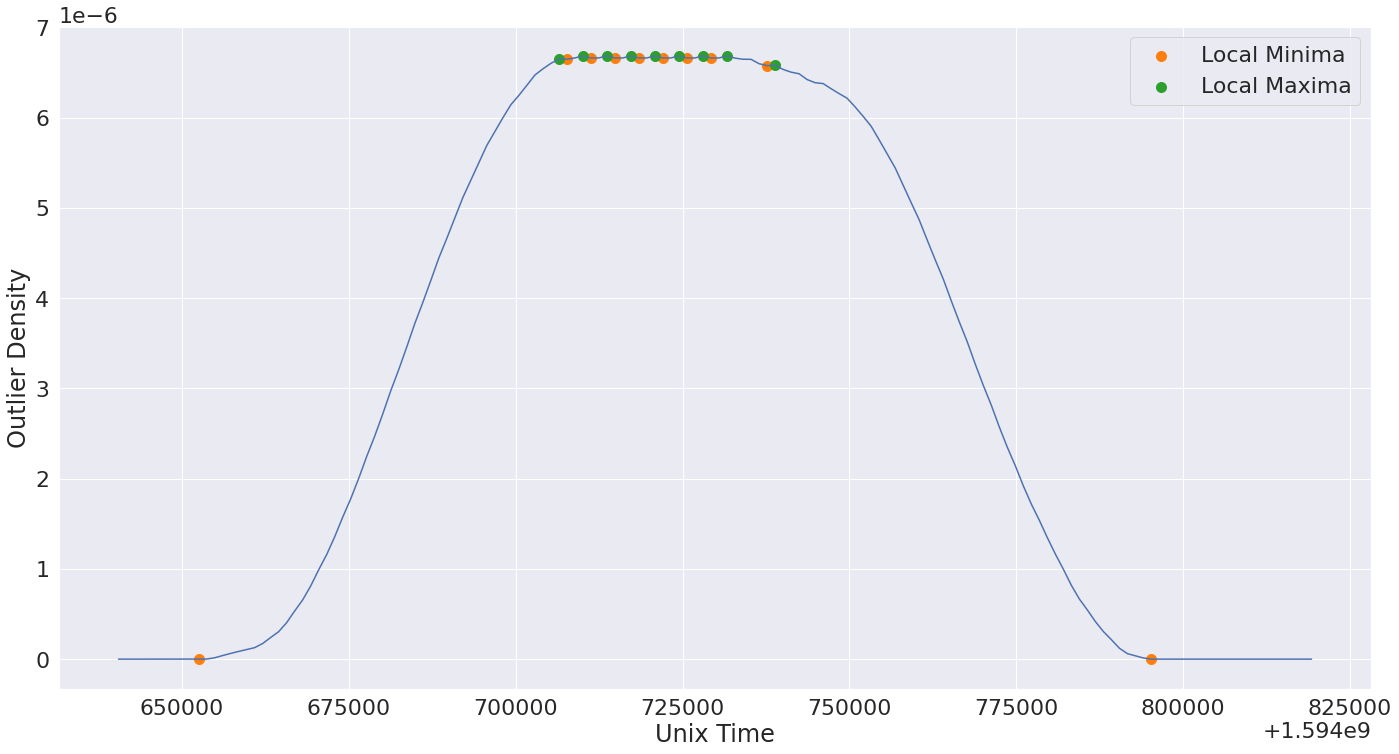

In [23]:
minima_pts_df = density_df_filtered[density_df_filtered.index.isin(minima)]
maxima_pts_df = density_df_filtered[density_df_filtered.index.isin(maxima)]

plt.plot(density_df_filtered['unix_time'], density_df_filtered['density'])
plt.scatter(minima_pts_df['unix_time'], minima_pts_df['density'], s=100, color='tab:orange', label='Local Minima')
plt.scatter(maxima_pts_df['unix_time'], maxima_pts_df['density'], s=100, color='tab:green', label='Local Maxima')
plt.xlabel('Unix Time');plt.ylabel('Outlier Density');plt.legend();plt.tight_layout()
plt.savefig('../figures/benchmarking/region_boundaries/local_minima_local_maxima.svg')

In [17]:
df, density_df, clusters_df, selected_bandwidth = utils.clustering.perform_clustering(df=df, kernel='epa', bandwidth_selection='ISJ', bandwidth=86400, adjusted_local_minima=True)
clusters_df

,cluster_id,start,end,point_start,point_end,time_length,num_points,area,area_pts
0,1,1.594652e+09,1.594797e+09,1.594678e+09,1.594771e+09,144598.657718,26,1.000156,0.925753


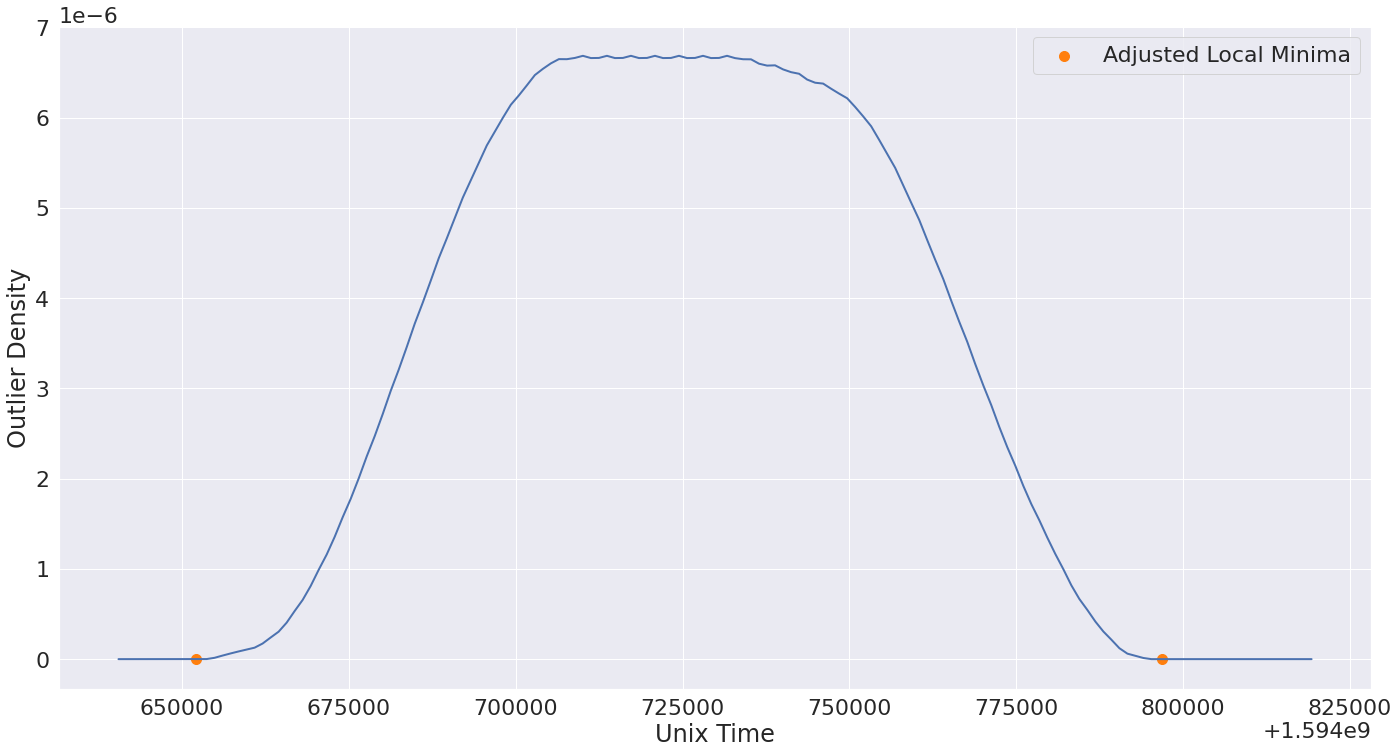

In [25]:
plt.plot(density_df_filtered['unix_time'], density_df_filtered['density'], linewidth=2)
plt.scatter([clusters_df['start'], clusters_df['end']], [0,0], s=100, color='tab:orange', label='Adjusted Local Minima')
plt.xlabel('Unix Time');plt.ylabel('Outlier Density');plt.legend();plt.tight_layout()
plt.savefig('../figures/benchmarking/region_boundaries/adjusted_local_minima.svg')

# Testing

In [77]:
density_df_filtered = density_df[(density_df['unix_time'] >= 1.592e9) & (density_df['unix_time'] <= 1.5985e9)]
density_df_filtered = density_df_filtered.reset_index(drop=True)

# Get the list of detected outliers
df = df[(df['unix_time'] >= 1.592e9) & (df['unix_time'] <= 1.5985e9)]
outliers_df = df.copy()[df['raw_voting_score'] > 0]

minima = utils.clustering.get_local_minima(density_df_filtered['density'].to_numpy())
maxima = utils.clustering.get_local_maxima(density_df_filtered['density'].to_numpy())

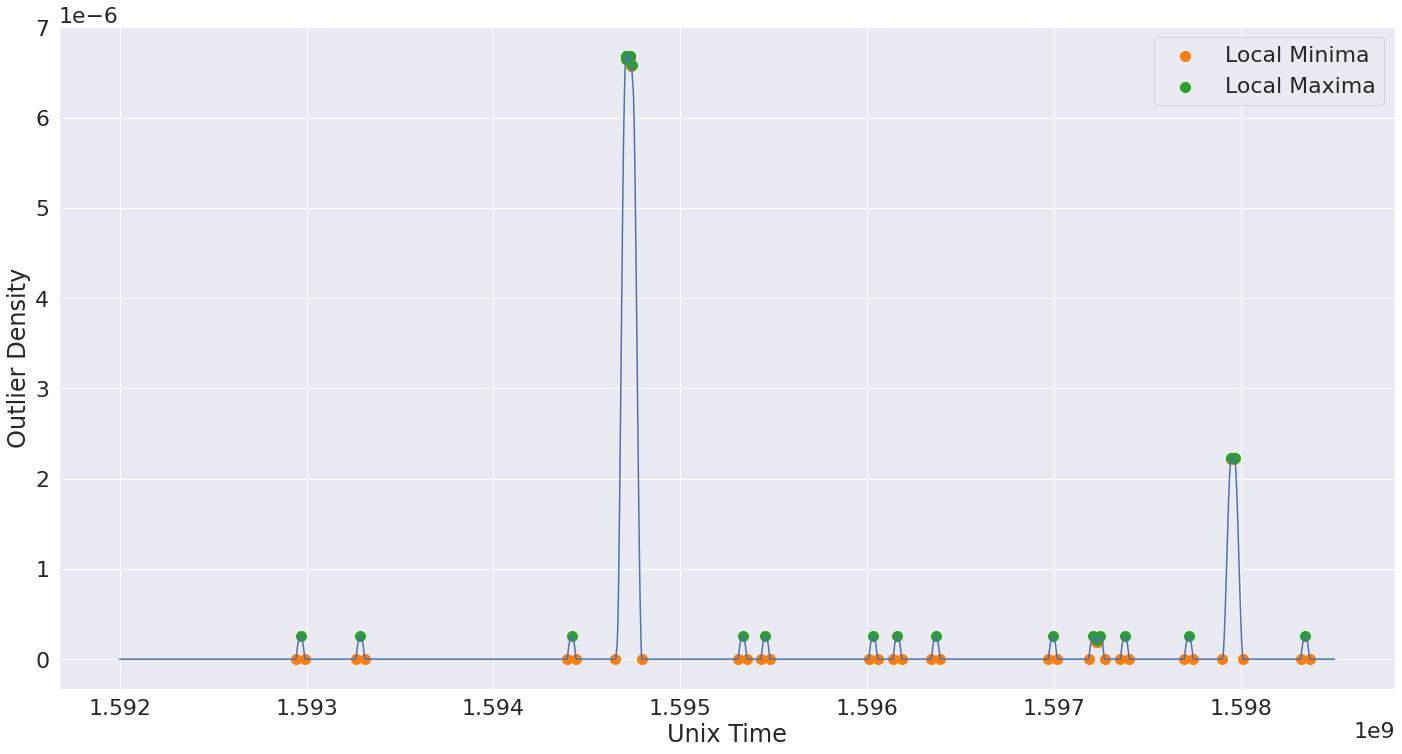

In [78]:
minima_pts_df = density_df_filtered[density_df_filtered.index.isin(minima)]
maxima_pts_df = density_df_filtered[density_df_filtered.index.isin(maxima)]

plt.plot(density_df_filtered['unix_time'], density_df_filtered['density'])
plt.scatter(minima_pts_df['unix_time'], minima_pts_df['density'], s=100, color='tab:orange', label='Local Minima')
plt.scatter(maxima_pts_df['unix_time'], maxima_pts_df['density'], s=100, color='tab:green', label='Local Maxima')
plt.xlabel('Unix Time');plt.ylabel('Outlier Density');plt.legend();plt.tight_layout()